In [1]:
## conda environment Weather_Prediction

import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', None)

In [2]:
PATH = os.path.join('..','Weather_Data','CAMS','2003','2003_single_level_34_variables.nc')
cams_data = xr.open_dataset(PATH) ## single_level_34 variables CAMS data
cams_data

<xarray.Dataset> Size: 1GB
Dimensions:     (valid_time: 2920, latitude: 34, longitude: 78)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 23kB 2003-01-01 ... 2003-12-31T21...
  * latitude    (latitude) float64 272B 49.25 48.5 47.75 ... 26.0 25.25 24.5
  * longitude   (longitude) float64 624B -124.8 -124.1 -123.3 ... -67.85 -67.1
Data variables: (12/34)
    u10         (valid_time, latitude, longitude) float32 31MB ...
    v10         (valid_time, latitude, longitude) float32 31MB ...
    d2m         (valid_time, latitude, longitude) float32 31MB ...
    t2m         (valid_time, latitude, longitude) float32 31MB ...
    bcaod550    (valid_time, latitude, longitude) float32 31MB ...
    duaod550    (valid_time, latitude, longitude) float32 31MB ...
    ...          ...
    tc_hno3     (valid_time, latitude, longitude) float32 31MB ...
    tcno2       (valid_time, latitude, longitude) float32 31MB ...
    tc_no       (valid_time, latitude, longitude) float32 31MB ...
    gtco3       (valid_time, latitude, longitude) float32 31MB ...
    tc_pan      (valid_time, latitude, longitude) float32 31MB ...
    tc_c3h8     (valid_time, latitude, longitude) float32 31MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-12T21:08 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
t2m=cams_data.t2m -273.15  ## get 2 metre temperature and convert into celsius
t2m

<xarray.DataArray 't2m' (valid_time: 2920, latitude: 34, longitude: 78)> Size: 31MB
array([[[ 5.1684875,  4.823761 ,  4.08255  , ..., -8.413544 ,
         -8.175262 , -6.500458 ],
        [ 8.1753235,  6.0639954,  5.481964 , ..., -6.1479187,
         -6.5766296, -8.275848 ],
        [ 9.634308 ,  7.3735657,  6.631378 , ..., -4.971161 ,
         -5.828583 , -7.4809265],
        ...,
        [17.4263   , 17.343292 , 17.382355 , ..., 22.328644 ,
         22.034698 , 21.759308 ],
        [17.398956 , 17.299347 , 17.258331 , ..., 22.99759  ,
         22.731964 , 22.480011 ],
        [17.378448 , 17.302277 , 17.268097 , ..., 23.68216  ,
         23.387238 , 23.099152 ]],

       [[ 5.4091797,  5.086914 ,  4.3095703, ..., -7.283203 ,
         -7.0966797, -5.442383 ],
        [ 8.256836 ,  5.939453 ,  5.4003906, ..., -4.34375  ,
         -4.791992 , -6.573242 ],
        [ 9.517578 ,  6.921875 ,  5.2978516, ..., -2.4414062,
         -2.961914 , -4.7314453],
...
        [17.931885 , 17.992432 , 18.00708  , ..., 21.94458  ,
         21.87622  , 21.702393 ],
        [18.514893 , 18.604736 , 18.537354 , ..., 21.840088 ,
         21.837158 , 21.683838 ],
        [18.744385 , 18.760986 , 18.63208  , ..., 21.870361 ,
         21.88794  , 21.874268 ]],

       [[ 2.8537598,  1.7043457,  1.1066895, ..., -9.684326 ,
         -9.030029 , -7.8728027],
        [ 3.0549316,  2.6594238,  2.4699707, ..., -8.350342 ,
         -8.041748 , -8.64917  ],
        [ 4.552002 ,  4.1555176,  4.3615723, ..., -6.3015137,
         -7.36792  , -7.8864746],
        ...,
        [17.714111 , 17.71997  , 17.639893 , ..., 22.264893 ,
         22.206299 , 22.050049 ],
        [18.147705 , 18.16919  , 18.263916 , ..., 22.243408 ,
         22.149658 , 21.994385 ],
        [18.614502 , 18.648682 , 18.753174 , ..., 22.17212  ,
         22.052979 , 21.948486 ]]], shape=(2920, 34, 78), dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 23kB 2003-01-01 ... 2003-12-31T21...
  * latitude    (latitude) float64 272B 49.25 48.5 47.75 ... 26.0 25.25 24.5
  * longitude   (longitude) float64 624B -124.8 -124.1 -123.3 ... -67.85 -67.1

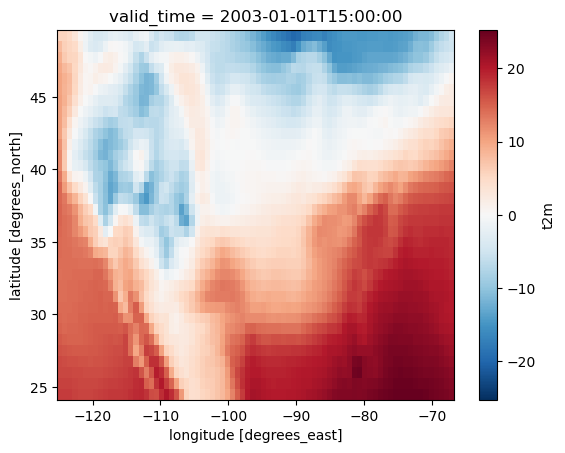

In [4]:
## get the fifth time stamp and plot it
air2d=t2m.isel(valid_time=5)
air2d.plot()

In [5]:
## get the state shapefile

SHAPE_PATH = os.path.join('..','Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)

## include only contiguous shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape

The CRS of the SHAPE file is: EPSG:4269


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


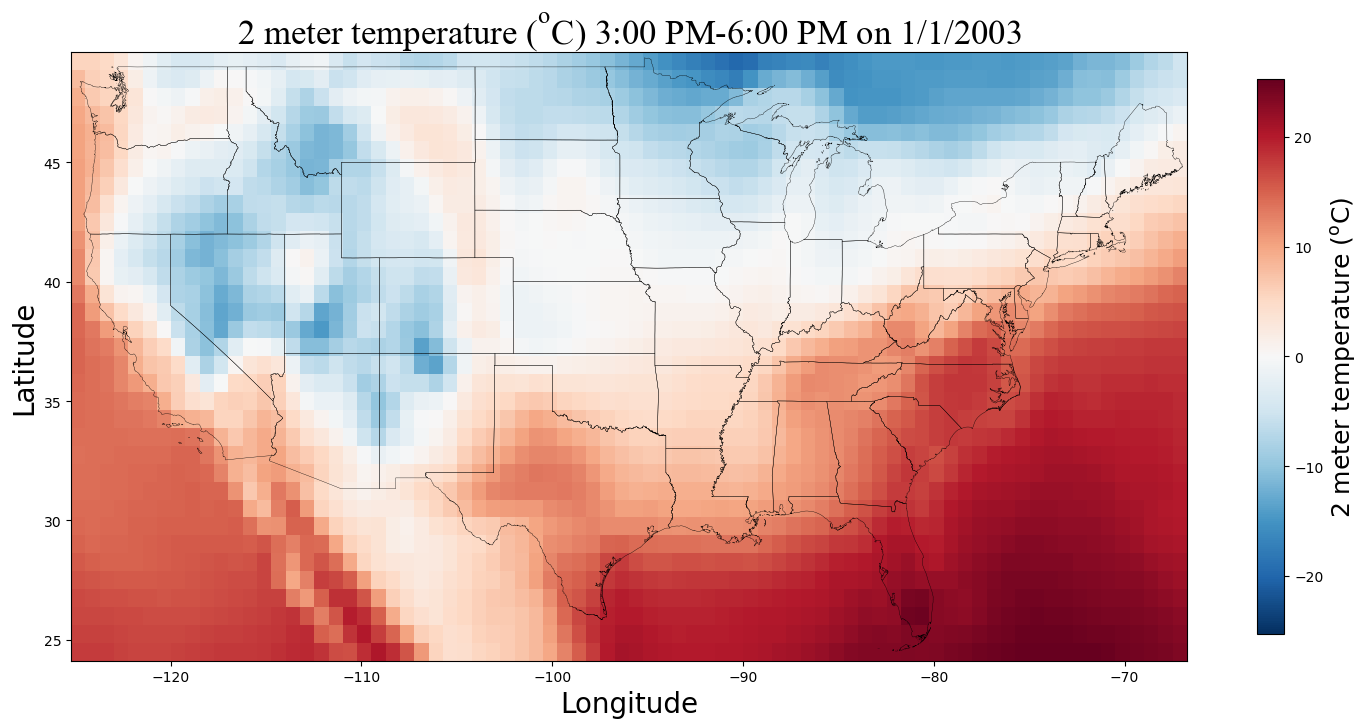

In [6]:
fig, ax= plt.subplots(1,figsize=(18,12) )
air2d=t2m.isel(valid_time=5)

cbar_kwargs = {'shrink':0.6}
plot_obj = air2d.plot(cbar_kwargs=cbar_kwargs)

cbar = plot_obj.colorbar

# Change the font size of the colorbar label
cbar.set_label('2 meter temperature ($\\mathregular{^o}$C)', size=18) 

state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)
 
# add a title and annotation
hfont = {'fontname':'Times New Roman'}
plt.title('2 meter temperature ($\\mathregular{^o}$C) 3:00 PM-6:00 PM on 1/1/2003',**hfont,
                     fontdict={'fontsize': '25', 'fontweight' : '1'})
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.savefig('CAMS_t2m')

In [7]:
## now lets do the ERA5 data
PATH_2 = os.path.join('..','Weather_Data','ERA5','2003','era_2003.nc')
era_data = xr.open_dataset(PATH_2) ## get the era5 data
era_data

<xarray.Dataset> Size: 542MB
Dimensions:         (valid_time: 2920, pressure_level: 1, latitude: 100,
                     longitude: 232)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 23kB 2003-01-01 ... 2003-12-3...
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 800B 49.25 49.0 48.75 ... 25.0 24.75 24.5
  * longitude       (longitude) float64 2kB -124.8 -124.6 ... -67.35 -67.1
    expver          (valid_time) <U4 47kB ...
Data variables:
    r               (valid_time, pressure_level, latitude, longitude) float32 271MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 271MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-05T22:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
relative_humidity=era_data.r   ## get the relative humidity data
relative_humidity

<xarray.DataArray 'r' (valid_time: 2920, pressure_level: 1, latitude: 100,
                       longitude: 232)> Size: 271MB
[67744000 values with dtype=float32]
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 23kB 2003-01-01 ... 2003-12-3...
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 800B 49.25 49.0 48.75 ... 25.0 24.75 24.5
  * longitude       (longitude) float64 2kB -124.8 -124.6 ... -67.35 -67.1
    expver          (valid_time) <U4 47kB ...
Attributes: (12/31)
    GRIB_paramId:                             157
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      23200
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           r
    GRIB_totalNumber:                         0
    GRIB_units:                               %
    long_name:                                Relative humidity
    units:                                    %
    standard_name:                            relative_humidity

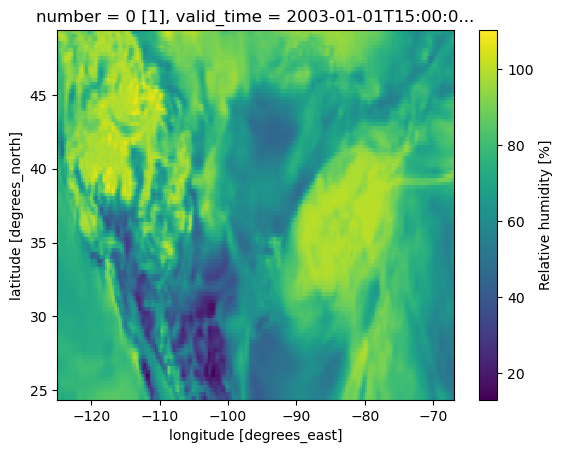

In [9]:
## get the fifth time stamp and plot it
rh=relative_humidity.isel(valid_time=5)
rh.plot()

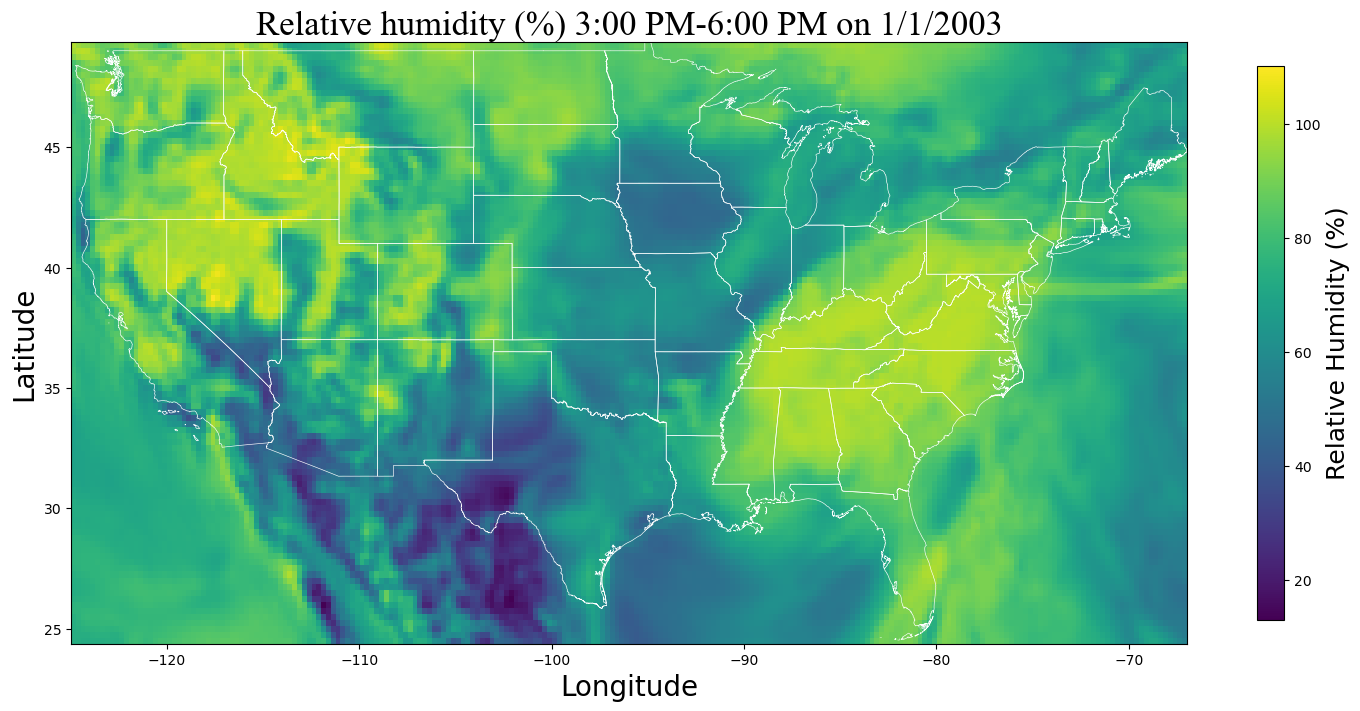

In [10]:
fig, ax= plt.subplots(1,figsize=(18,12) )
rh=relative_humidity.isel(valid_time=5)

cbar_kwargs = {'shrink':0.6, 'label':'Relative Humidity (in %)'}
plot_obj = rh.plot(cbar_kwargs=cbar_kwargs)
cbar = plot_obj.colorbar

# Change the font size of the colorbar label
cbar.set_label('Relative Humidity (%)', size=18) 

state_shape.plot(facecolor='none', edgecolor = 'white', ax=ax, linewidth=0.45)
 
# add a title and annotation
hfont = {'fontname':'Times New Roman'}
plt.title('Relative humidity (%) 3:00 PM-6:00 PM on 1/1/2003',**hfont,
                     fontdict={'fontsize': '25', 'fontweight' : '1'})
plt.ylabel('Latitude', fontsize = 20)
plt.xlabel('Longitude', fontsize = 20)
plt.savefig('ERA5_relative_humidity')